# ElasticNet Regression with scikit-learn

This notebook creates and measures an ElasticNet regression model using sklearn.

* Method: ElasticNet Regression
* Dataset: Big Mart dataset

## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [2]:
data = pd.read_csv('../data/bigmart/big_mart_train.csv')

In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## Data Preprocessing

In [6]:
# Handle missing values
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)
data['Item_Visibility'] = data['Item_Visibility'].replace(0,np.mean(data['Item_Visibility']))
data['Outlet_Establishment_Year'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Size'].fillna('Small',inplace=True)

In [7]:
# Create dummy variables to convert categorical data into numeric values
object_cols = list(data.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(data[object_cols], prefix= object_cols)
data.drop(object_cols, axis=1, inplace = True)
X = pd.concat([data, dummies], axis =1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,3735.1380,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,14,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,15,732.3800,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,26,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,15.168133,2181.288914,0.000704,0.000821,0.000939,0.000352,0.000587,...,0.109351,0.327702,0.562947,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.048742,62.275067,8.371760,1706.499616,0.026525,0.028648,0.030625,0.018759,0.024215,...,0.312098,0.469403,0.496051,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.003575,31.290000,4.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.033085,93.826500,9.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.062517,143.012800,14.000000,1794.331000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,26.000000,3101.296400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,28.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Fit an ElasticNet Regression Model

In [9]:
# Splitting into training and cv for cross validation
X = X.drop('Item_Outlet_Sales',1)
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, data.Item_Outlet_Sales, test_size=0.3, random_state=42)

In [10]:
'''
Create an instance of a ElasticNet Regression model

alpha = a + b
l1_ratio = a / (a+b)

a and b are the weights assigned to L1 and L2 term respectively
If l1_ratio = 1 then we have Lasso
If l1_ratio = 0 then we have Ridge
If l1_ratio is between 0 and 1 we have a combination

'''

model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
model.fit(X_train, Y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

**Intercept Coefficient**: represents the mean change in the response variable for one unit of change in the predictor variable while holding everything else constant. It isolates the role of one variable from all others.

In [11]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(model.intercept_))

Estimated intercept coefficient: -242.23203765593644


In [12]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['features', 'coefficients'])
fc_df.head()

,features,coefficients
0,Item_Weight,-1.698454
1,Item_Visibility,-14.743682
2,Item_MRP,15.671591
3,Outlet_Establishment_Year,12.582432
4,Item_Identifier_DRA12,-0.196450


## Predict a Price

In [13]:
y_pred = model.predict(X_test)

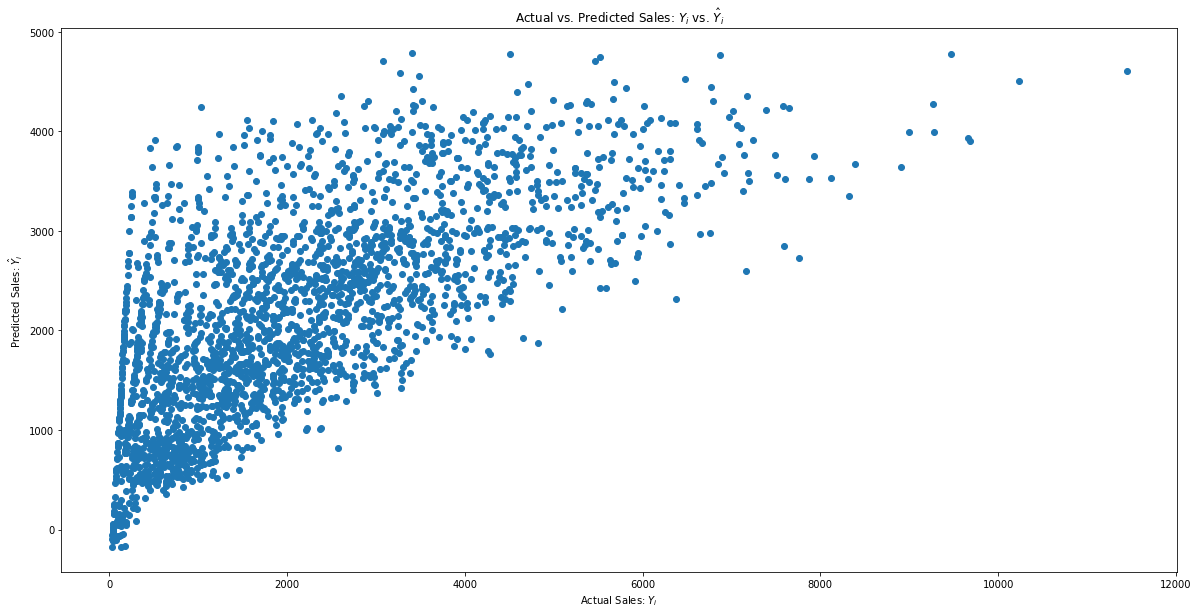

In [14]:
# Create a plot to compare actual sales (Y_test) and the predicted sales (pred_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Sales: $Y_i$")
plt.ylabel("Predicted Sales: $\hat{Y}_i$")
plt.title("Actual vs. Predicted Sales: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

## Model Evaluation

### Mean Squared Error

In [15]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, model.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 1583652.827982172


In [16]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, model.predict(X_test))))

MSE Test Data: 1483449.476716381


### Variance (R^2) Score

* Explains how much of the variability of a factor can be caused or explained by its relationship to another factor; how well the model is predicting.
* A score of 1 means a perfect prediction
* A score of 0 means the model always predicts the expected value of y, disregarding the input features

In [17]:
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: 0.47


## Residual Plot

**Residuals**: the difference between the predictions and the actuals.


**Interpretation**: If the model is working well then the data should be randomly scattered around line zero. If there is structure in the data, that means the model is not capturing something, perhaps interaction between two variables or it's time dependent. Check the parameters of your model.

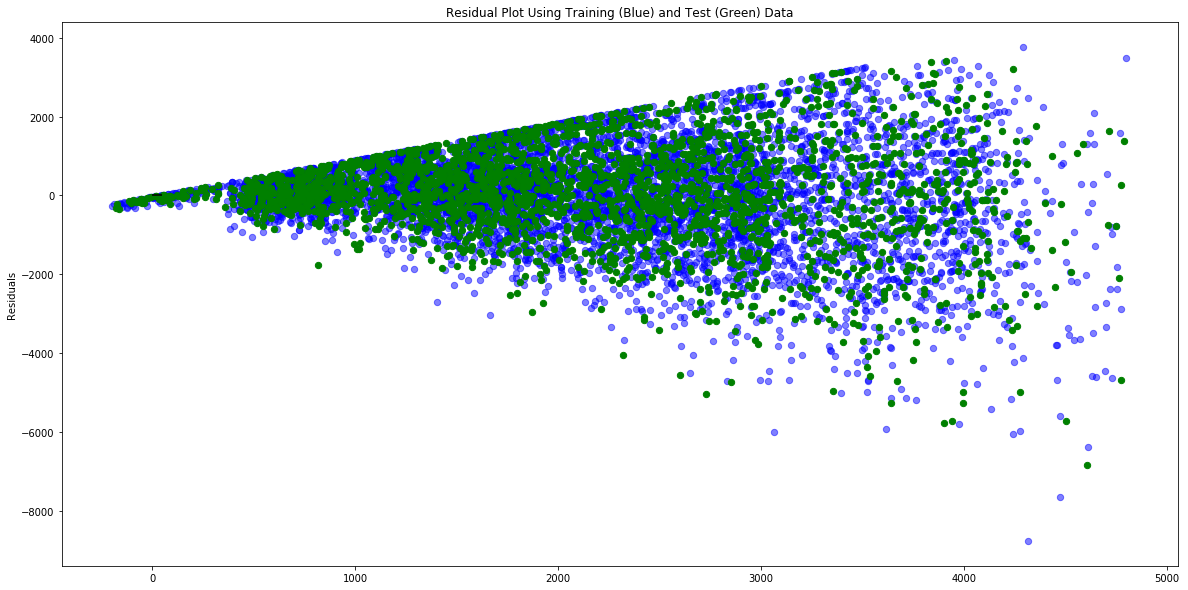

In [18]:
# Create a residual plot
fig = plt.figure(figsize=(20,10))
plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()

**Interpretation**

The funnel shape indicates Heteroskedasticity. The variance of error terms(residuals) is not constant. Generally, non-constant variance arises in the presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance.

This indicates signs of non linearity in the data which has not been captured by the model.

## Different Alpha

## Fit a New Model

In [19]:
model_2 = ElasticNet(alpha=.5, l1_ratio=0.5, normalize=False)
model_2.fit(X_train, Y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
print('Estimated intercept coefficient: {}'.format(model_2.intercept_))

Estimated intercept coefficient: -296.2656514903424


### Predict a Price

In [21]:
y2_pred = model_2.predict(X_test)

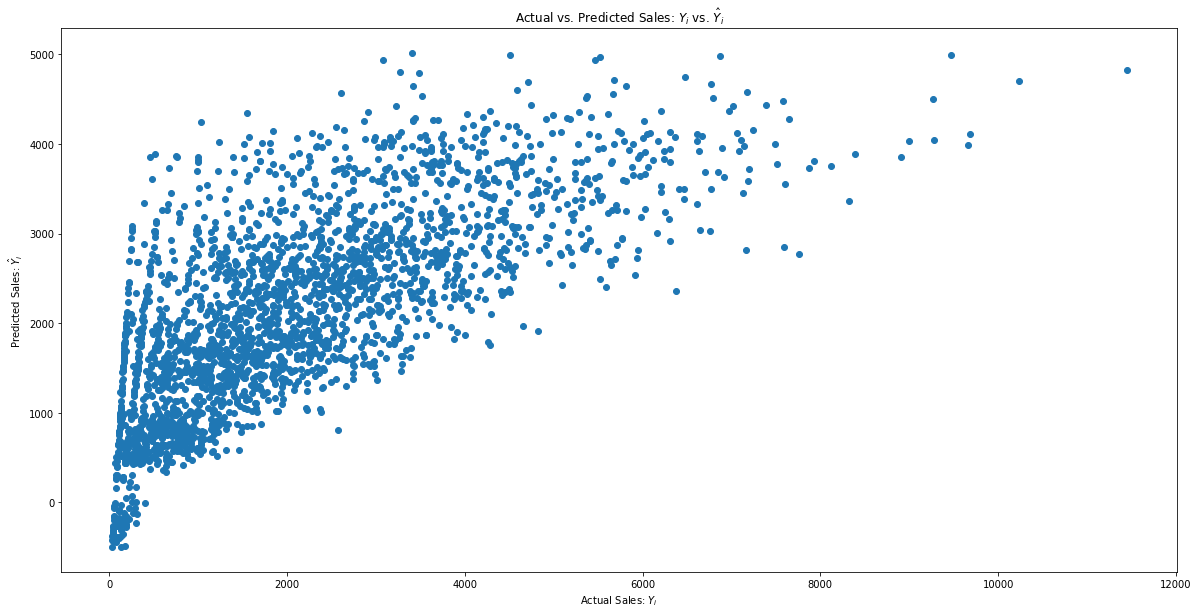

In [22]:
# Create a plot to compare actual sales (Y_test) and the predicted sales (pred_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, y2_pred)
plt.xlabel("Actual Sales: $Y_i$")
plt.ylabel("Predicted Sales: $\hat{Y}_i$")
plt.title("Actual vs. Predicted Sales: $Y_i$ vs. $\hat{Y}_i$")
plt.show()

## Model Evaluation

### Mean Squared Error

In [23]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, model_2.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 1457191.5526253039


In [24]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, model_2.predict(X_test))))

MSE Test Data: 1359849.4441803598


### Variance (R^2) Score

* Explains how much of the variability of a factor can be caused or explained by its relationship to another factor; how well the model is predicting.
* A score of 1 means a perfect prediction
* A score of 0 means the model always predicts the expected value of y, disregarding the input features

In [25]:
print("Variance Score: %.2f" % r2_score(Y_test, y2_pred))

Variance Score: 0.51


## Residual Plot

**Residuals**: the difference between the predictions and the actuals.


**Interpretation**: If the model is working well then the data should be randomly scattered around line zero. If there is structure in the data, that means the model is not capturing something, perhaps interaction between two variables or it's time dependent. Check the parameters of your model.

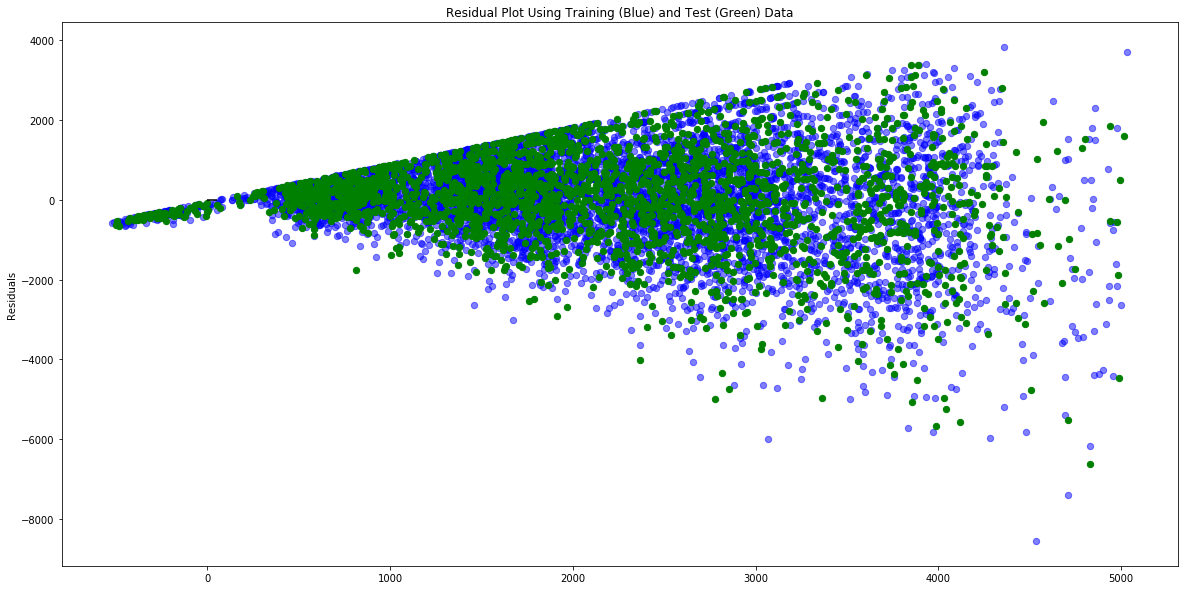

In [26]:
# Create a residual plot
fig = plt.figure(figsize=(20,10))
plt.scatter(model_2.predict(X_train), model_2.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(model_2.predict(X_test), model_2.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()